In [4]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [8]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [11]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


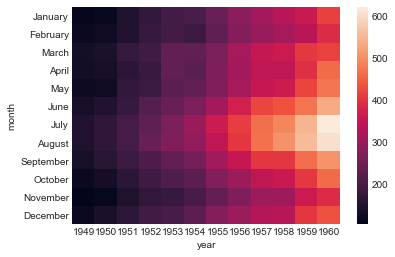

In [12]:
sns.heatmap(flight_dframe)

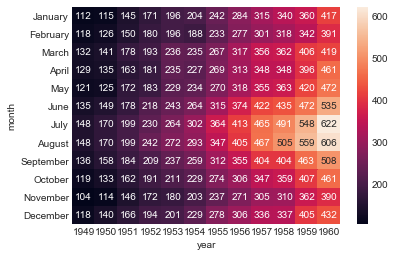

In [13]:
# 数字を書き込み
sns.heatmap(flight_dframe, annot=True, fmt='d')

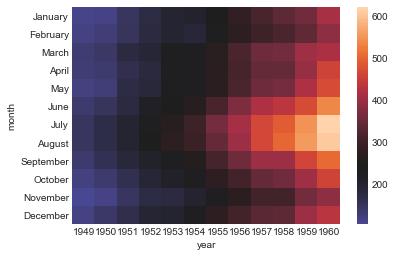

In [14]:
#中心を指定して、色を変えられます。
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

# 年毎の客数の棒グラフ、ヒートマップ

In [19]:
yearly_flights = flight_dframe.sum()
yearly_flights

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

In [20]:
years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)
years

,0
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [21]:
flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)
flights

,0
0,1520
1,1676
2,2042
3,2364
4,2700
5,2867
6,3408
7,3939
8,4421
9,4572


In [22]:
year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']
year_dframe

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


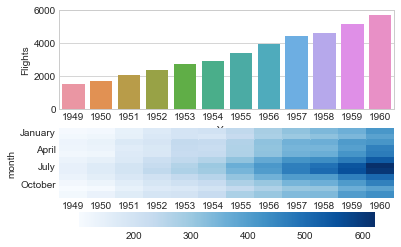

In [23]:
f, (axis1, axis2) = plt.subplots(2, 1)
sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

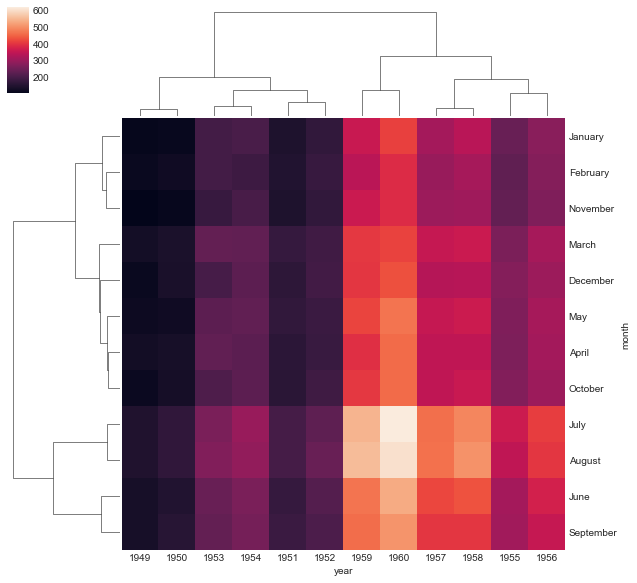

In [24]:
sns.clustermap(flight_dframe)

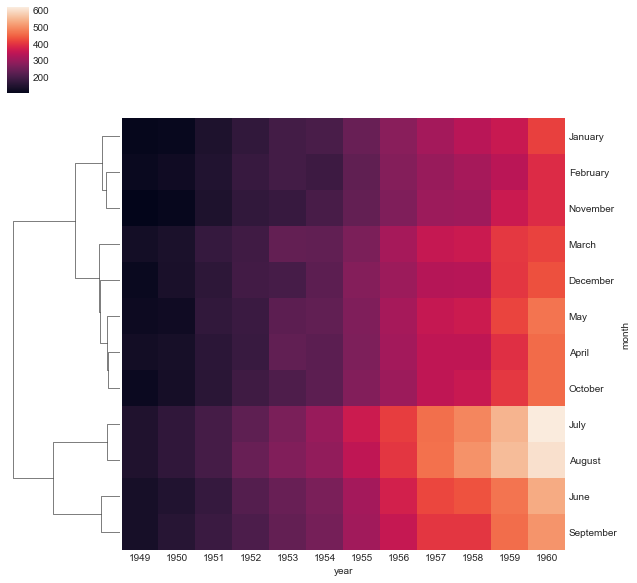

In [27]:
# col_cluster=False -> 列方向(縦方向のクラスタリングをしない)
# -> yearはそのまま
sns.clustermap(flight_dframe, col_cluster=False)

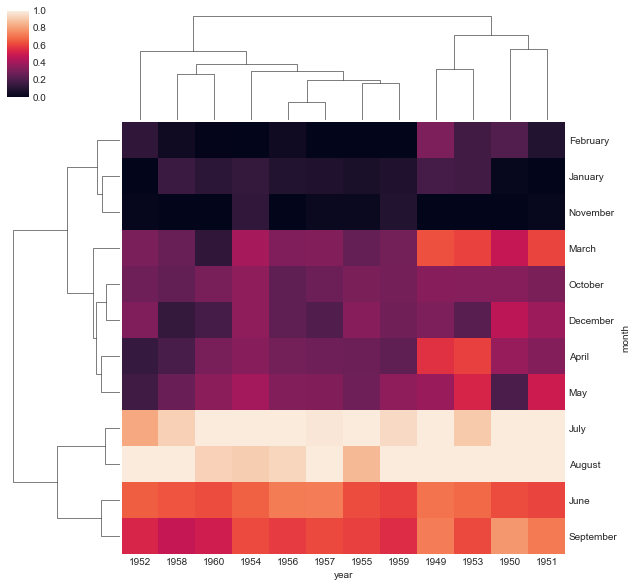

In [30]:
# standard_scale=1 -> 年代毎の違いを吸収(数字を標準化) 1:列方向
# -> July,Augの夏の時期が高くなっている
sns.clustermap(flight_dframe, standard_scale=1)

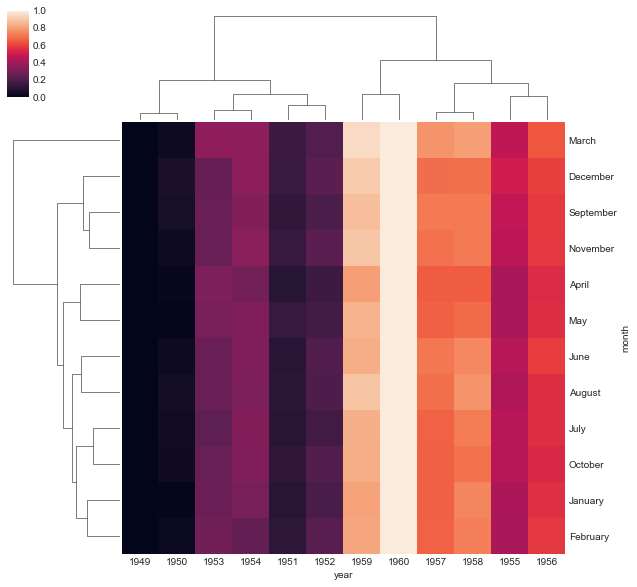

In [29]:
sns.clustermap(flight_dframe, standard_scale=0)

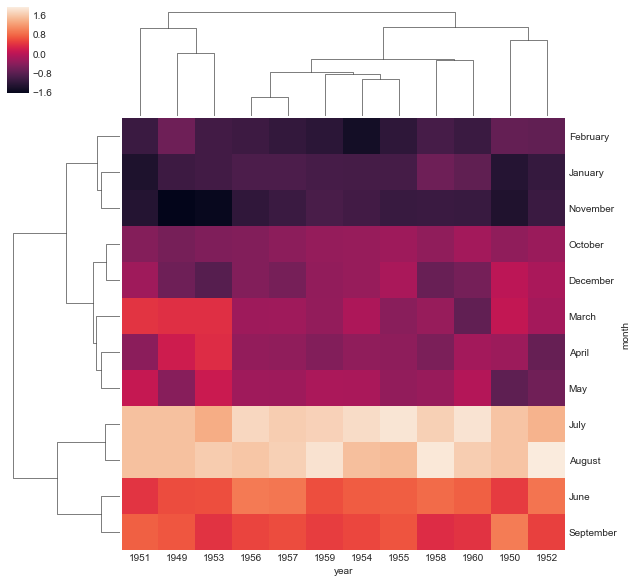

In [31]:
# z_score=1 -> データから平均値を引いて標準偏差で割る
# -> データの全体のブレが中心が0、分散(標準偏差)が1になるようにデータが変換されるので、比較がしやすい
sns.clustermap(flight_dframe, z_score=1)